# Identificar fronteras no lineales

In [1]:
from sklearn.datasets.samples_generator import make_circles

In [2]:
X, Y = make_circles(100, factor = .1, noise=.1)

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

In [8]:
def plt_svc(model, ax=None, plot_support=True):
    """
    Plot de la función de decisión para una clasificación en 2D con SVC
    """
    
    if ax is None:
        ax = plt.gca()
    
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    ## Generamos la parrilla de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy, xx)
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ## Representamos las fronteras y los márgenes del SVC
    ax.contour(X, Y, P, colors="k", levels=[-1, 0, 1], alpha=0.5, linstyles=["--", "-", "--"])
    

    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors="blue")
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

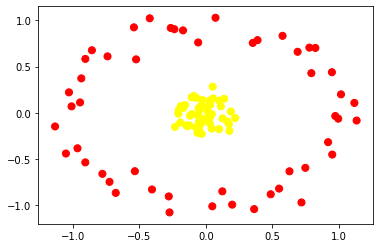

In [6]:
plt.scatter(X[:, 00], X[:, 1], c=Y, s=50, cmap="autumn")

/home/diego/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: The following kwargs were not used by contour: 'linstyles'


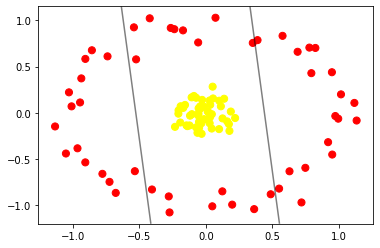

In [9]:
plt.scatter(X[:, 00], X[:, 1], c=Y, s=50, cmap="autumn")
plt_svc(SVC(kernel="linear").fit(X, Y), plot_support=False)

In [10]:
r = np.exp(-(X**2).sum(1))
r

array([0.29415092, 0.95316344, 0.40145641, 0.3984865 , 0.40171249,
       0.29879583, 0.96974552, 0.97127891, 0.98667924, 0.96854879,
       0.93288526, 0.50524151, 0.94903342, 0.34536615, 0.98240701,
       0.49834313, 0.98784579, 0.96632348, 0.31299869, 0.35841835,
       0.35916213, 0.98091351, 0.47924816, 0.38876455, 0.2334161 ,
       0.95942551, 0.35356517, 0.42719395, 0.31729922, 0.95797587,
       0.30342293, 0.29133067, 0.9261397 , 0.41685565, 0.97306653,
       0.95818056, 0.31014302, 0.99666708, 0.37770523, 0.96847185,
       0.96519286, 0.43823441, 0.99686094, 0.96112342, 0.40363746,
       0.99617284, 0.35941454, 0.96119498, 0.99410339, 0.99453798,
       0.99322319, 0.96086734, 0.27062919, 0.97973353, 0.44332263,
       0.99778865, 0.9959206 , 0.40903269, 0.9670354 , 0.99513565,
       0.36341421, 0.36997878, 0.99523655, 0.29669026, 0.97311597,
       0.33093247, 0.98623816, 0.33909727, 0.46316782, 0.387392  ,
       0.99957063, 0.33583301, 0.99956374, 0.40137697, 0.95872

In [11]:
from mpl_toolkits import mplot3d

In [12]:
def plot_3D(elev=30, azim=30, X=X, Y=Y, r=r):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:, 0], X[:, 1], r, c=Y, s=50, cmap="autumn")
    ax.view_init(elev=elev, azim=azim)
    
    ax.set_xlabel("x[0]")
    ax.set_ylabel("y[1]")
    ax.set_zlabel("r")

In [13]:
from ipywidgets import interact, fixed

In [15]:
interact(plot_3D, elev=[-90, -60, -30, 0, 30, 60, 90],
         azim=[-180, -150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180],
         X=fixed(X), Y=fixed(Y), r=fixed(r))

interactive(children=(Dropdown(description='elev', index=4, options=(-90, -60, -30, 0, 30, 60, 90), value=30),…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-0.4220712 ,  1.02250584],
       [-0.19261147, -0.10425789],
       [ 0.7479573 , -0.59431993],
       [-0.73936926,  0.61107672],
       [ 0.68972539,  0.66052821],
       [-0.6776205 , -0.86534688],
       [ 0.04394757, -0.16967675],
       [-0.05104559, -0.16289862],
       [ 0.02846229, -0.11225049],
       [-0.15679595,  0.08585714],
       [ 0.17720767, -0.19511664],
       [-0.53393857, -0.63057777],
       [-0.03203078, -0.22646256],
       [ 0.07237746,  1.02854831],
       [ 0.11282461,  0.07085329],
       [ 0.35271519,  0.75634543],
       [-0.0517562 , -0.09772394],
       [ 0.16037341, -0.09239591],
       [-0.90610624,  0.58354756],
       [ 0.57650863,  0.83288187],
       [ 0.1978999 , -0.99237947],
       [ 0.12525653, -0.05984806],
       [ 0.12380757, -0.84865094],
       [ 0.91893391, -0.31676782],
       [ 0.71881609, -0.96862583],
       [-0.08984681,  0.18261476],
       [-0.77784143, -0.65928003],
       [